In [14]:
import pandas as pd
import numpy as np
from invertiblewavelets import Transform, LinearFilterBank
import matplotlib.pyplot as plt
from invertiblewavelets import *
from scipy import signal
%matplotlib inline

#### Load Example Data from Swarm A Spacecraft Magnetoemter

In [15]:
data = np.load("data.npy")
sample_rate = 50.0                          # 50 Hz sampling rate
num_samples = data.shape[-1]                # 5000 samples
t = np.arange(num_samples) / sample_rate    # time array

#### Create Transform Object and Analysis Filters

In [16]:
"Filterbank"
fb = DyadicFilterBank(wavelet=Cauchy(1000) , fs=sample_rate, N=4*5000, real=True, s_max = 10, dj = 1/18, compensation=True)

"Transform"
transform = Transform(
    data=data,
    fs = sample_rate,
    filterbank=fb,
)

Text(0.5, 1.0, 'Filterbank Frequencies')

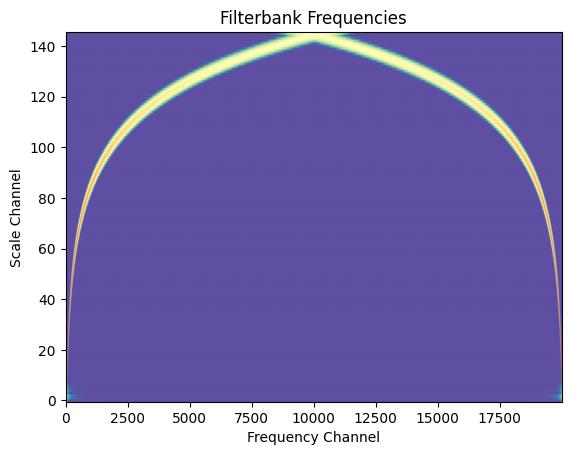

In [17]:
fig, ax = plt.subplots(1,1)
ax.imshow(np.log(np.abs(transform.Wfreq)+1e-3), aspect='auto', origin='lower', cmap='Spectral_r', interpolation=None)
ax.set_ylabel('Scale Channel')
ax.set_xlabel('Frequency Channel')
plt.title('Filterbank Frequencies')

#### Plot Wavelet Coefficients

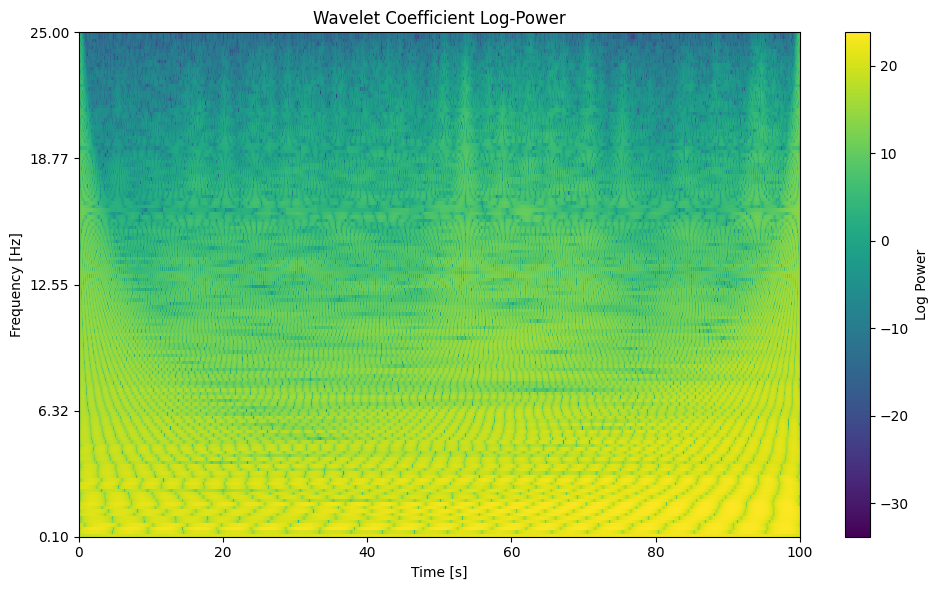

In [18]:
# Perform forward wavelet transform
coefficients = transform.forward(data, mode='same')
transform.scalogram(coefficients)

Reconstruction error: 2.293563273012346e-13


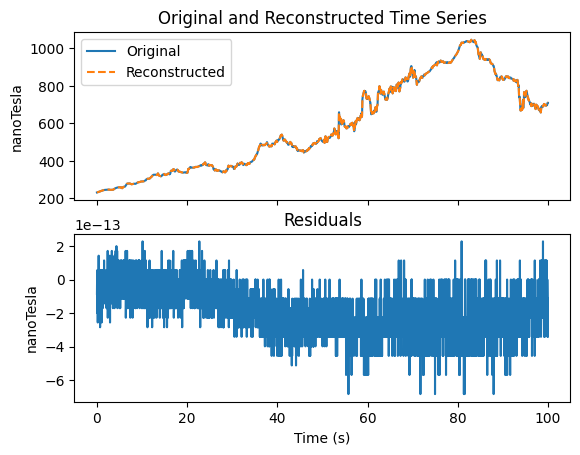

In [19]:
# Perform forward wavelet transform
coefficients = transform.forward(data, mode='full')

# Perform inverse wavelet transform (reconstruction)
reconstructed = transform.inverse(coefficients)

# Calculate and print reconstruction error
reconstruction_error = np.sqrt(np.mean((reconstructed - data)**2))
print(f"Reconstruction error: {reconstruction_error}")

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, data, label='Original')
ax[0].plot(t, reconstructed, label='Reconstructed', linestyle='--')    
ax[0].set_ylabel('nanoTesla')
ax[0].legend()
ax[0].set_title('Original and Reconstructed Time Series')
ax[1].plot(t, data - reconstructed)
ax[1].set_title('Residuals')
ax[1].set_ylabel('nanoTesla')
ax[1].set_xlabel('Time (s)')
plt.show()

#### Check Wavelet Orthgonality

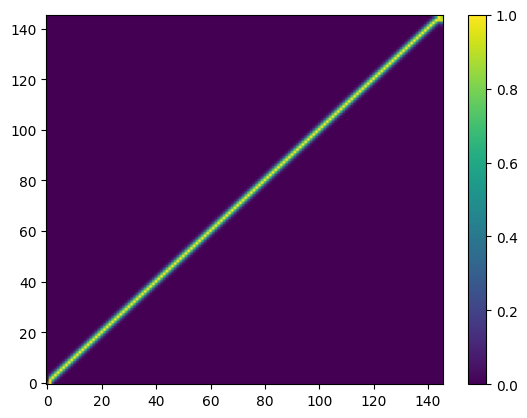

In [20]:
w_time = np.fft.ifft(transform.Wfreq, axis=-1)
delta_kl = w_time.conj() @ w_time.T
delta_kl = delta_kl / np.max(delta_kl, axis=1)[:, np.newaxis]
plt.imshow(np.abs(delta_kl), aspect='auto', origin='lower')
cbar = plt.colorbar()